In [2]:
import matplotlib.pyplot as plt
import subprocess as sp
import random as rn
import numpy as np
import scipy

In [10]:

def under_int(x,y,r,psi):
    return np.sqrt(x**2+y**2+r**2-2*np.sqrt(x**2+y**2)*np.cos(psi))
    #wyżej mamy tylko mianownik
def double_integral(rho,R,l0):
    x,y=l0
    radius=np.linspace(0,R,INT_RES)
    angle=np.linspace(0,2*np.pi,INT_RES)
    integral=0
    dr=radius[1]-radius[0]
    dp=angle[1]-angle[0]
    for r in radius:
        for p in angle:
            integral += under_int(x,y,r,p)*dr*dp
    return integral*rho

def under_rad_int(x,y,r):
    #a = 1/abs(r-np.sqrt(x**2+y**2))*r*scipy.special.ellipkinc(np.pi,1j*np.sqrt(4*r*np.sqrt(x**2+y**2)/(r-np.sqrt(x**2+y**2))**2))-scipy.special.ellipkinc(0,1j*np.sqrt(4*r*np.sqrt(x**2+y**2)/(r-np.sqrt(x**2+y**2))**2))/abs(r-np.sqrt(x**2+y**2))*r
    a = 1/abs(r-np.sqrt(x**2+y**2))*r*scipy.special.ellipkinc(np.pi,(4*r*np.sqrt(x**2+y**2))/(r-np.sqrt(x**2+y**2))**2)-scipy.special.ellipkinc(0,(4*r*np.sqrt(x**2+y**2))/(r-np.sqrt(x**2+y**2))**2)/abs(r-np.sqrt(x**2+y**2))*r
    return a
    #zakomentowane a jest chyba błędne w związku z definicją i notacją całki eliptycznej, nie wiem czy należy sprawdzać
    #jeśli nie zadziała to podziałamy powyższym (i tak elementy obliczeniowe trzeba przenieść do cpp)
def radius_integral(R,rho,l0):#l0 musi być postaci dwukrotki
    integral=0
    radius=np.linspace(0,R,INT_RES)
    dr=radius[1]-radius[0]
    for i in radius:
        integral += under_rad_int(*l0,i)*dr
    return rho*integral



#jeśli się uprzeć wystarczy pierwsza dwucałka

In [23]:

INT_RES=1000
#sama funkcja podcałkowa, całkę na nią nałożymy
def under_integral(m,M,l0,rho,phi,z):#rho to jedyna zmienna
    DELl02=l0[0]**2+l0[1]**2
    DELr2=(rho**2+DELl02-2*rho*np.sqrt(DELl02)*np.cos(phi)+z**2)
    #return rho*((mx*Mx+my*My+mz*Mz+mspec*Mspec)/DELr2**2-5*(   5*)/DELr2**3)
    return rho*((m*M)/DELr2**2-5*m*M/DELr2**3)
    #w całce trzeba jeszcze przemnożyć przez dr dphi dz
    
def integral(R,Z,m,M,l0):
    #m i M są trzykrotkami, direction to
    rho=np.linspace(0,R,INT_RES)
    zlin=np.linspace(-Z/2,Z/2,INT_RES)
    phi=np.linspace(0,2*np.pi,INT_RES)
    drho=rho[1]-rho[0]
    dz=zlin[1]-zlin[0]
    dphi=phi[1]-phi[0]
    result=0
    for r in rho:
        for z in zlin:
            for p in phi:
                result += under_integral(m,M,l0,r,p,z)*drho*dz*dphi
    return result #result to składowa F w kierunku direction, więc trzeba takich puścić 3
    #nie, jest straszny błąd, tylko jedna składowa F zostanie, radialna składowa, trzeba ogarnąć tylko RADIALNĄ (poprawić direction), wtedy te sumki są równe 0
    #nawet jeśli potrzeba więcej niż radialnej w ogólności to w szczególności zostaje radialna.


    

#będzie trzeba całość zrobić w cpp

In [25]:
p0=[1,1,[1,2],1,1,1]
print(under_integral(*p0))
#integrałka wymaga ponad 30 minut, w cpp to jest ~30 sekund.

-0.004322798386592087


In [85]:
RESOLUTION=100
#kod musi generować odległość i macierz wartości, rozdzielczość będzie miała znaczenie później, w związku z ogromną ilością obliczeń razej przeniosę (przynajmniej pierwszą) całkę do cpp, w pythonie będziemy tylko rysować.
#dla każdej macierzy automatycznie liczymy odległości w środkach kwadratów względem środka danego magnesu. wszystkie macierze wszystkich magnesów układamy w krotce i sumujemy, potem rysujemy i to chyba wszystko. Będę generował 7(?) magnesów, więc obliczeń będzie sporo.
def zero_array(big):
    a=[]
    for i in range(big):
        a.append(0)
    return a

def summation(arr):
    matrix=1
    for i in range(RESOLUTION):
        matrix.append(zero_array(RESOLUTION)) 
    for m in arr:
        for i in range(RESOLUTION):
            for k in range(RESOLUTION):
                matrix[i][k] += m[i][k]
    return matrix

#pierwsza wersja, potem można sprawdzić kolejną jednak ta jest najpewniejsza
def matrix_gen(size, center, radius, rho):
    #size to długość od boku do boku
    size_mul=size/RESOLUTION
    x,y=center
    matrix=[]
    for i in range(RESOLUTION):
        matrix.append(zero_array(RESOLUTION)) 
    
    for i in range(RESOLUTION):
        for k in range(RESOLUTION):
            xm, ym=(i-RESOLUTION/2)*size_mul, (k-RESOLUTION/2)*size_mul
            l0=[xm-x, ym-y]
            matrix[i][k]=double_integral(rho,radius,l0)


            #srodek=RESOLUTION/2 == INT
            #size tylko skaluje






In [86]:
#chyba teraz czas rzecz przetestować, potem przepiszemy do cpp który zapisze kod w pliku txt
#w ramach referencji mój kod do maszynki komurkowej powinien wystarczyć

In [87]:
class Magnet:
    def __init__(self,R,Z,M,x,y):#można dopisać siłę jeśli będzie jakiś problem
        self.R=R
        self.Z=Z
        self.M=M
        self.x=x
        self.y=y

In [68]:
#Kwestia przeczytania:
xlen = 20
ylen = 20
nx=10
ny=10
test_magnetisation=1
#wielkości i mlplr muszę sobie odpowiednio dobrać
class Magnet:
    matrix=[[]]
    def __init__(self,R,Z,M,x,y):#można dopisać siłę jeśli będzie jakiś problem
        self.R=R
        self.Z=Z
        self.M=M
        self.x=x
        self.y=y

magnets=[]

m1 = Magnet(1,0.5,-100,4,5)
magnets.append(m1)

m2 = Magnet(1,0.5,-100,2,1)
magnets.append(m2)

m2 = Magnet(1,0.5,-100,7,1)
magnets.append(m2)

def distance(x,y,mag_x,mag_y):
    return [xlen/nx*(x-mag_x), ylen/ny*(y-mag_y)]

for ms in magnets:
    matrix=[]
    for i in range(ny):
        row=[]
        for k in range(nx):
            row.append(0)
        matrix.append(row)
    ms.matrix=matrix
#teraz są zainicjalizowane, każdy posiada własną macierz, na obrazku dobrze będzie zaznaczyć gdzie znajdują się te ścierwa.
#Przyjdzie jeszcze do kalkulacji odległości, wtedy mamy to względnie łatwe

for k in range(len(magnets)):
    m = magnets[k]
    for i in range(nx):
        for j in range(ny): #nie odwrotnie n?
            l0x, l0y = distance(i, j, m.x, m.y)
            sp.run(['./integral',str(m.R),
            str(m.Z),str(test_magnetisation),str(m.M),str(l0x),str(l0y)])

            with open('can.txt','r') as File:
                #print(File.readlines())
                m.matrix[i][j] = float(File.readlines()[0])
            File.close()

        print('skończono pętlę: ', i)
print('skończono magnes nr ', k+1)
#teraz pytanie czy dobra kolejność i i j?


#

skończono pętlę:  0
skończono pętlę:  1
skończono pętlę:  2
skończono pętlę:  3
skończono pętlę:  4
skończono pętlę:  5
skończono pętlę:  6
skończono pętlę:  7
skończono pętlę:  8
skończono pętlę:  9
skończono pętlę:  0
skończono pętlę:  1
skończono pętlę:  2
skończono pętlę:  3
skończono pętlę:  4
skończono pętlę:  5
skończono pętlę:  6
skończono pętlę:  7
skończono pętlę:  8
skończono pętlę:  9
skończono pętlę:  0
skończono pętlę:  1
skończono pętlę:  2
skończono pętlę:  3
skończono pętlę:  4
skończono pętlę:  5
skończono pętlę:  6
skończono pętlę:  7
skończono pętlę:  8
skończono pętlę:  9
skończono magnes nr  2


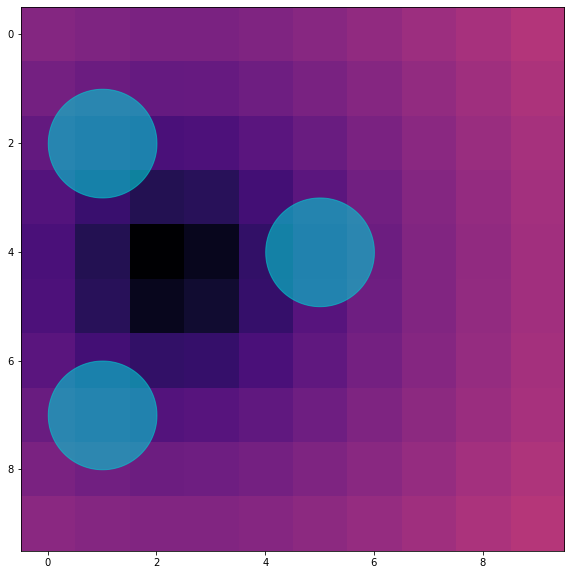

In [69]:
fig,ax = plt.subplots()
fig.set_size_inches(nx,ny)
#poprawka na magnes - w zerze jest zero

#for m in range(len(magnets)): #można to zrobić trochę inaczej
#    mag=magnets[m]
#    magnets[m].matrix[mag.x][mag.y]=0
#trzeba jasno stwierdzić jak ta tablica działa, gdzie x i gdzie y.
#trzeba przenieść do githuba i edytować samo repozytorium, updateować też z lokalnego kodu.


#można zwiększyć magnetyzację, będzie lepiej, można zmienić mnożnik odległości, będzie lepiej jeszcze,
#może lepiej skaluje się się (logarytmicznie? potęgą 4?) to wszystko (żeby widziało się lepiej)
finmat = np.array([np.array(ms) for ms in matrix])
for m in magnets:
    tempmat = np.array([np.array(ms) for ms in m.matrix])
    finmat +=tempmat
#coś jest nie tak z dodawaniem, sprawdzić i poprawić (napisać specjalną funkcję będzie bodaj najlepiej)




final = admat(magnets)

final = np.array([np.array(ms) for ms in final])


#finmat jest tym co chcemy osiągnąć
im = ax.imshow(final**0.25,cmap='magma',vmax=4)#liniujemy dla lepszej widoczności
#skalowanie potęgowe można dopracować w praktyce
for m in magnets:
    srodek=[m.x,m.y]
    #phi = np.linspace(0,2*np.pi,1000)
    #x = m.R*np.cos(phi)
    #y = m.R*np.sin(phi)
    x = np.linspace(m.y-m.R,m.y+m.R,1000)
    xx = np.linspace(-m.R,m.R,1000)
    y = m.x-np.sqrt(m.R**2-xx**2)
    y2 = m.x+np.sqrt(m.R**2-xx**2)

    plt.fill_between(x,y,y2,alpha=0.6,color='darkturquoise')
    #chcemy narysować kółko w środku i narysować (na czerwono obwódką?) wokół tego punktu, rysujemy odpowiednimi parametrami magnesu

#może szybciej byłoby w octave?

#należy usuwać miejsca w których siedzą magnesy (można to robić ręcznie)

#do poprawienia ustawianie położenia magnesu
#w ramach testu trzeba będzie zrobić to kilku magnesom. KURDE BELE, trzeba jeszcze uwzględnić kierunki sił. to jest kwestia raczej prosta, ale still trzeba to zrobić. Ogarniemy już w pythonie na samych macierzach i magnesach.

#może da się ustawić maksima colormap 

In [66]:
# do zrobienia - kwestia kierunku
# chcemy funkcję która zsumuje po kierunku, więc modyfikujemy sumowanie macieży. rozrysuję to.


#działa tak - mamy dwie macierze x i y, na koniec każdy ich element dodajemy w kwadracie i pierwiastkujemy całość. może nawet wydalamy np.array?
def admat(mgnts):
    finalx=[]
    for i in range(len(mgnts[0].matrix[0])): #czy w dobrej kolejności te fory?
        row=[]
        for k in range(len(mgnts[0].matrix)):
            row.append(0)
        finalx.append(row)

    finaly=[]
    for i in range(len(mgnts[0].matrix[0])): #czy w dobrej kolejności te fory?
        row=[]
        for k in range(len(mgnts[0].matrix)):
            row.append(0)
        finaly.append(row)

    for m in mgnts:
        #teraz będziemy rzutować na osie wszystkie wartości:
        for i in range(len(m.matrix)):
            for j in range(len(m.matrix[i])):
                x_part, y_part=distance(i,j,m.x,m.y)#wcześniej też był liczony po i,j
                finalx[i][j]+=(x_part)
                finaly[i][j]+=(y_part)


    for i in range(len(final)):
        for j in range(len(final[i])):
            final[i][j]=np.sqrt(finalx[i][j]**2+finaly[i][j]**2)
                


#def distance(x,y,mag_x,mag_y):
#    return [xlen/nx*(x-mag_x), ylen/ny*(y-mag_y)]
        
        
    return final

In [ ]:
# przy kierunku można będzie określić